[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier-Stokes
======
## <font color='blue'> 나비어-스톡스 의 12 단계
***

This IPython notebook continues the presentation of the **12 steps to Navier-Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2: Non-linear Convection
-----
## <font color='blue'> 2단계: 비선형 대류
***

Now we're going to implement non-linear convection using the same methods as in step 1.  The 1D convection equation is:
<font color='red'>이제 우리는 1단계에서 사용한 방법과 같이 비선형 대류를 실현(**implement**)할 것입니다. 1차원 대류 방정식은 다음과 같습니다. </font>

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor$c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *non-linear*  We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.
<font color='red'> 두번째 항을 곱하는 상수요소(**constant factor**) $c$ 대신 이제 $u$를 곱하는 해(**solution**)가 있습니다. 그러므로, 방정식의 두번째 항은 이제 비선형(**non-linear**)입니다. 우리는 1단계와 같이 시간의 전향 차분 (**forward difference in time**)과 공간의 후방 차분(**backward difference in space**) 이산화를 사용합니다. 아래는 이산화 된 방정식입니다. </font>

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:
<font color='red'> 유일한 미지항 $u_i^{n+1}$ 을 풀면 다음과 같이됩니다.</font>

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

<font color='red'> 전과 같이 Python 코드는 필요한 라이브러리를 불러오는것 부터 시작합니다. 그 이후에는 공간과 시간의 이산화를 결정하는 몇개의 변수를 선정합니다 (여러분은 이 매개 변수를 변경해보며 일어나는 변화를 실험해봐야합니다). 마지막으로, $(0,2)$의 다른 어느 지점에서든지 $u = 2\ @\ 0.5 \leq x \leq 1$ 및 $u = 1$ 을 사용하여 해답의 배열을 초기화하여 초기 조건(**initial condition**) $u_0$을 만듭니다. (예: 삼각함수)
</font>

In [1]:
import numpy                 #we're importing numpy and calling it np locally
                             #(numpy를 임포트하고 로컬형식에서 np로 부릅니다)
from matplotlib import pyplot    #and our 2D plotting library, calling it plt
                                 #(그리고 2차원 표기 라이브러리를 plt라고 부릅니다)
%matplotlib inline


nx = 41
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
           #(nt는 우리가 계산하고자 하는 timesteps 의 수입니다)
dt = .025  #dt is the amount of time each timestep covers (delta t)
           # (dt는 각 timestep가 소요한 시간입니다)
    
u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
                        #(이전과 같이, 모든 값을 1로 u를 초기화 합니다)
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s
                                       # (I.C.s 당 0.5와 1사이로 u=2 를 설정합니다)
un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution
                    #(시간단계에 대해 계산 한 값을 유지하기 위해 placeholder 배열 un을 초기화합니다)

The code snippet below is *unfinished*. We have copied over the line from [Step 1](./01_Step_1.ipynb) that executes the time-stepping update. Can you edit this code to execute the non-linear convection instead?
<font color='red'>아래의 snippet 코드는 *미완료*  상태로, time-stepping 업데이트를 실행하는 라인을 [Step 1](./01_Step_1.ipynb) 에서 가져왔습니다. 아래 코드를 비선형 대류를 실행하도록 편집할수 있으신가요?

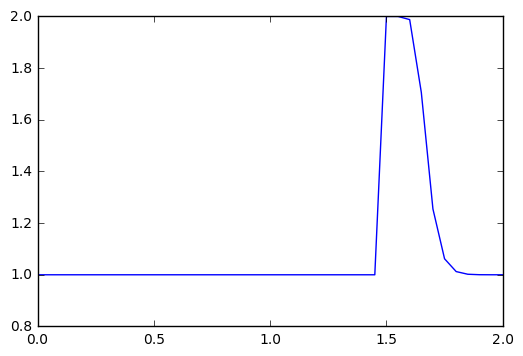

In [2]:
for n in range(nt):  #iterate through time (시간을 반복합니다)
    un = u.copy() ##copy the existing values of u into un (u의 기존값을 un에 복사합니다)
    for i in range(1, nx):  ##now we'll iterate through the u array (이제 u 배열을 반복합니다)
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ### (아래의 방정식은 1단계에서 복사해온것입니다. 새로운 방정식을 위해 수정하세요 )
     ###then uncomment it and run the cell to evaluate Step 2   
     ### (그러고 나서 주석 기호및 주석들을 지우고 2단계를  평가하기 위해 실행하세요) 
           ###u[i] = un[i] - c * dt / dx * (un[i] - un[i-1]) 

        
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results (결과를 플로팅(표기)하세요)

What do you observe about the evolution of the hat function under the non-linear convection equation? What happens when you change the numerical parameters and run again?
<font color='red'> 비선형 대류 방정식에서 삼각형함수 (**hat function**)의 변화에서 무엇이 발견됬나요? 수치 매게변수(**numerical parameter**)를 변경하고 다시 실행했을때는 어떻게 되나요?

## Learn More
### <font color='blue'>더 알아보기

For a careful walk-through of the discretization of the convection equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.
<font color='red'>대류 방정식의 이산화와 유한 차분을 신중히 배우시기를 원한다면 (1에서 4단계까지 포함), Braba 박사님의 유투브 영상 **Video Lesson 4** 를 시청해주세요.

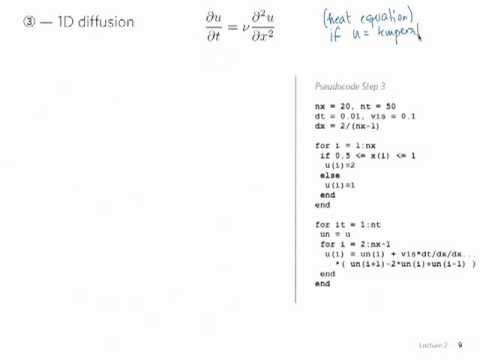

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)